# Lego Analysis

Small analysis of Lego Dataset - mostly to exercise how to combine data and retrieve informations. \
Data from https://rebrickable.com/downloads/
## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year? Per set per year and total bricks in all sets per year.
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.
4. Figures: does Lego add now more figures to sets than in 1950? What are most common figures? How the number of figures changes? What are mean per set and total number of figures per year through time?
5. What are the 5 most popular colors used in Lego parts?
6. What proportion of Lego parts are transparent? What are most common transparent bricks? What are top 5 transparent colors? When first transparent bricks were used? What colors became transparent through time?
7. What are the 5 rarest lego bricks?
8. What is the proportion of spare parts per set? Did it change through time?
9. Summarize your findings.


### <b>0. Prepare dataframes for analysis

It is crucial to understand that Lego sets may be in different versions and that is why there is more than one version of the set in the inventories table.

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Prepare elements

In [2]:
elements_table = pd.read_csv('data\elements.csv.gz', usecols=[0, 1, 2])
elements_table['color_id'] = elements_table['color_id'].astype('category')
print('Elements table head: \n')
print(elements_table.head())
print('\nshape:', elements_table.shape)
print('\nElements table info: \n')
elements_table.info()

Elements table head: 

   element_id       part_num color_id
0     6443403  2277c01pr0009        1
1     4566309           2564        0
2     4275423          53657     1004
3     6194308          92926       71
4     6229123          26561        4

shape: (95282, 3)

Elements table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95282 entries, 0 to 95281
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   element_id  95282 non-null  int64   
 1   part_num    95282 non-null  object  
 2   color_id    95282 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 1.6+ MB


<b>Prepare sets table


In [3]:
sets_table = pd.read_csv('data\sets.csv.gz', usecols=[0, 1, 2, 3, 4])
sets_table['year'] = sets_table['year'].astype('category')
sets_table['theme_id'] = sets_table['theme_id'].astype('category')
decades_ranges = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2020, np.inf]
decades_names = [x for x in range(1950, 2030, 10)]
sets_table['decade'] = pd.cut(sets_table['year'], bins=decades_ranges, labels=decades_names)
print('Sets table head: \n')
print(sets_table.head())
print('\nshape:', sets_table.shape)
print('\nSets table info: \n')
sets_table.info()

Sets table head: 

        set_num                         name  year theme_id  num_parts decade
0  0003977811-1  Ninjago: Book of Adventures  2022      761          1   2020
1         001-1                        Gears  1965      756         43   1960
2        0011-2            Town Mini-Figures  1979       67         12   1970
3        0011-3   Castle 2 for 1 Bonus Offer  1987      199          0   1980
4        0012-1           Space Mini-Figures  1979      143         12   1970

shape: (23873, 6)

Sets table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23873 entries, 0 to 23872
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   set_num    23873 non-null  object  
 1   name       23873 non-null  object  
 2   year       23873 non-null  category
 3   theme_id   23873 non-null  category
 4   num_parts  23873 non-null  int64   
 5   decade     23873 non-null  category
dtypes: category(3), int64(1), object(

<b>Prepare inventory_parts table

In [4]:
inventory_parts_df = pd.read_csv('data\inventory_parts.csv.gz', usecols=[0, 1, 2, 3, 4])
inventory_parts_df['is_spare'] = inventory_parts_df['is_spare'] == 't'
inventory_parts_df['part_num'] = inventory_parts_df['part_num'].astype('category')
inventory_parts_df['inventory_id'] = inventory_parts_df['inventory_id'].astype('category')
inventory_parts_df['color_id'] = inventory_parts_df['color_id'].astype('category')
print('Inventory parts table head: \n')
print(inventory_parts_df.head())
print('\nshape:', inventory_parts_df.shape)
print('\nInventory parts table info: \n')
inventory_parts_df.info()

Inventory parts table head: 

  inventory_id        part_num color_id  quantity  is_spare
0            1        48379c04       72         1     False
1            1           48391        0         1     False
2            1           48395        7         1     False
3            1        48864c01       25         1     False
4            1  stickerupn0077     9999         1     False

shape: (1286599, 5)

Inventory parts table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286599 entries, 0 to 1286598
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   inventory_id  1286599 non-null  category
 1   part_num      1286599 non-null  category
 2   color_id      1286599 non-null  category
 3   quantity      1286599 non-null  int64   
 4   is_spare      1286599 non-null  bool    
dtypes: bool(1), category(3), int64(1)
memory usage: 27.0 MB


<b>Prepare minifigs table

In [16]:
minifigs_df = pd.read_csv('data\minifigs.csv.gz', usecols=[0, 1, 2])
print('Minifigs table head: \n')
print(minifigs_df.head())
print('\nshape:', minifigs_df.shape)
print('\nInventory minifigs table info: \n')
minifigs_df.info()

Minifigs table head: 

      fig_num                                      name  num_parts
0  fig-000001                        Toy Store Employee          4
1  fig-000002                              Customer Kid          4
2  fig-000003                     Assassin Droid, White          8
3  fig-000004  Man, White Torso, Black Legs, Brown Hair          4
4  fig-000005           Captain America with Short Legs          3

shape: (14843, 3)

Inventory minifigs table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fig_num    14843 non-null  object
 1   name       14843 non-null  object
 2   num_parts  14843 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ KB


<b>Prepare minifigs inventory table


In [5]:
inventory_minifigs_df = pd.read_csv('data\inventory_minifigs.csv.gz')
print('Inventory minifigs table head: \n')
print(inventory_minifigs_df.head())
print('\nshape:', inventory_minifigs_df.shape)
print('\nInventory minifigs table info: \n')
inventory_minifigs_df.info()

Inventory minifigs table head: 

   inventory_id     fig_num  quantity
0             3  fig-001549         1
1             4  fig-000764         1
2            19  fig-000555         1
3            25  fig-000574         1
4            26  fig-000842         1

shape: (22471, 3)

Inventory minifigs table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22471 entries, 0 to 22470
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  22471 non-null  int64 
 1   fig_num       22471 non-null  object
 2   quantity      22471 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 526.8+ KB


In [18]:
# merge minifigs with minifigs inventory table
inventory_minifigs_df = inventory_minifigs_df.merge(minifigs_df, on='fig_num', how='left')
print('Inventory minifigs table head: \n')
print(inventory_minifigs_df.head())
print('\nshape:', inventory_minifigs_df.shape)
print('\nInventory minifigs table info: \n')
inventory_minifigs_df.info()

Inventory minifigs table head: 

   inventory_id     fig_num  quantity  \
0             3  fig-001549         1   
1             4  fig-000764         1   
2            19  fig-000555         1   
3            25  fig-000574         1   
4            26  fig-000842         1   

                                                name  num_parts  
0                 Emma - Lavender Top, Magenta Skirt          4  
1                    Danny Longlegs / Corporal Steel          4  
2                               Coca-Cola Defender 2          4  
3  Minnie Mouse with Dark Pink with White Spots D...          5  
4  Coast Guard, Blue Jacket with Zipper and ID Ba...          4  

shape: (22471, 5)

Inventory minifigs table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22471 entries, 0 to 22470
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  22471 non-null  int64 
 1   fig_num       22471 non-null  ob

<b>Prepare inventory sets table

In [6]:
inventory_sets_df = pd.read_csv('data\inventory_sets.csv.gz')
print('Inventory sets table head: \n')
print(inventory_sets_df.head())
print('\nshape:', inventory_sets_df.shape)
print('\nInventory sets table info: \n')
inventory_sets_df.info()

Inventory sets table head: 

   inventory_id  set_num  quantity
0            35  75911-1         1
1            35  75912-1         1
2            39  75048-1         1
3            39  75053-1         1
4            50   4515-1         1

shape: (4556, 3)

Inventory sets table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4556 entries, 0 to 4555
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  4556 non-null   int64 
 1   set_num       4556 non-null   object
 2   quantity      4556 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 106.9+ KB


<b>Prepare inventories table

In [7]:
inventories_df = pd.read_csv('data\inventories.csv.gz')
inventories_df.rename(columns={'id': 'inventory_id'}, inplace=True)
print('Inventories table head: \n')
print(inventories_df.head())
print('\nshape:', inventories_df.shape)
print('\nInventories table info: \n')
inventories_df.info()

Inventories table head: 

   inventory_id  version set_num
0             1        1  7922-1
1             3        1  3931-1
2             4        1  6942-1
3            15        1  5158-1
4            16        1   903-1

shape: (40462, 3)

Inventories table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  40462 non-null  int64 
 1   version       40462 non-null  int64 
 2   set_num       40462 non-null  object
dtypes: int64(2), object(1)
memory usage: 948.5+ KB


Proceeding with inventories dataframe first. 
Version is version of set - for example set 421-2 is in different colors. But 8030-1 is in two versions - newer and older. I will count as each version is a unique set -> set no + version no makes it a unique set number. 
In addition I will add a test whether the versions are identical or not -> if not then I will consider them as different sets. 

In [8]:
# first find duplicated set numbers and keep the set number, version and inventory_id for them in multiple_versions_sets
multiple_versions_sets = inventories_df.loc[inventories_df.duplicated(subset=['set_num'], keep=False)].sort_values(by='set_num')
multiple_versions_sets.head(10)

inventory_id  version   set_num
35125        163782        2    0014-1
3248           5004        1    0014-1
35573        171262        1  010423-1
38634        221307        2  010423-1
39160        229399        2     088-1
8974          13887        1     088-1
15185         46115        2   10001-1
7142          11090        1   10001-1
15046         44145        2   10030-1
3094           4773        1   10030-1

In [9]:
# prepare inventory_id_to_delete table (should be empty)
inventory_id_to_delete = set()
for set_num in multiple_versions_sets['set_num'].unique():
   # print(set)
    ids = multiple_versions_sets[multiple_versions_sets['set_num'] == set]['inventory_id']
    for i, id in enumerate(ids[:-1]):
        original_df_parts = inventory_parts_df[inventory_parts_df['inventory_id'] == id]
        original_df_parts.reset_index(inplace=True)
        original_df_parts.drop(columns=['inventory_id', 'index'], inplace=True)
        original_df_minifigs = inventory_minifigs_df[inventory_minifigs_df['inventory_id'] == id]
        original_df_minifigs.reset_index(inplace=True)
        original_df_minifigs.drop(columns=['inventory_id', 'index'], inplace=True)
        original_df_sets = inventory_sets_df[inventory_sets_df['inventory_id'] == id]
        original_df_sets.reset_index(inplace=True)
        original_df_sets.drop(columns=['inventory_id', 'index'], inplace=True)
        for id_to_compare in ids[i+1:]:
            df_to_compare_parts = inventory_parts_df[inventory_parts_df['inventory_id'] == id_to_compare]
            df_to_compare_parts.reset_index(inplace=True)
            df_to_compare_parts.drop(columns=['inventory_id', 'index'], inplace=True)
            df_to_compare_minifigs = inventory_minifigs_df[inventory_minifigs_df['inventory_id'] == id_to_compare]
            df_to_compare_minifigs.reset_index(inplace=True)
            df_to_compare_minifigs.drop(columns=['inventory_id', 'index'], inplace=True)
            df_to_compare_sets = inventory_sets_df[inventory_sets_df['inventory_id'] == id_to_compare]
            df_to_compare_sets.reset_index(inplace=True)
            df_to_compare_sets.drop(columns=['inventory_id', 'index'], inplace=True)
            if original_df_parts.equals(df_to_compare_parts) and original_df_minifigs.equals(df_to_compare_minifigs) \
                and original_df_sets.equals(df_to_compare_sets):
                inventory_id_to_delete.add(id_to_compare)

In [10]:
print(len(inventory_id_to_delete))

0


In [11]:
multiple_versions_sets[multiple_versions_sets['set_num'].str.match('fig')].shape

(0, 3)

So, as I supposed, there is nothing to delete from inventories_df, each pair of set_num + version should be considered as a unique set. 

Each figure has only one and only inventory - so it is unique.

Now, I am going to prepare a big dataframe with a lot of numbers in it - count of parts, spare parts, figures, sets etc so that I can start analyzing the data by set numbers (questions 1, 2 and 3).

In [12]:
parts_per_inventory = pd.pivot_table(inventory_parts_df, values='quantity', index=['inventory_id'], columns=['is_spare'], \
                                     aggfunc="sum", fill_value=0).reset_index()
parts_per_inventory.rename(columns={False: 'parts', True: 'spares'}, inplace=True)
print(parts_per_inventory.head())
print('\nshape:', parts_per_inventory.shape)
print('\ncolumn_names:', parts_per_inventory.columns)

is_spare inventory_id  parts  spares
0                   1      5       0
1                   3     39       3
2                   4     16       1
3                  15      2       0
4                  16     10       0

shape: (34363, 3)

column_names: Index(['inventory_id', 'parts', 'spares'], dtype='object', name='is_spare')


In [13]:
# merge inventories_df with parts_per_inventory
inventories_df = inventories_df.merge(parts_per_inventory, on='inventory_id', how='left')
inventories_df.fillna(0, inplace=True)
inventories_df['parts'] = inventories_df['parts'].astype(int)
inventories_df['spares'] = inventories_df['spares'].astype(int)
print(inventories_df.head())
print('\nshape:', inventories_df.shape)
print('\ninfo:' )
inventories_df.info()

  inventory_id  version set_num  parts  spares
0            1        1  7922-1      5       0
1            3        1  3931-1     39       3
2            4        1  6942-1     16       1
3           15        1  5158-1      2       0
4           16        1   903-1     10       0

shape: (40462, 5)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  40462 non-null  object
 1   version       40462 non-null  int64 
 2   set_num       40462 non-null  object
 3   parts         40462 non-null  int32 
 4   spares        40462 non-null  int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 1.2+ MB


In [13]:
# TODO - minifigs per inventory


In [ ]:
# TODO - sets + MERGE

In [ ]:
# TODO - MERGE

In [22]:
inventories_df.shape

(40462, 3)

In [22]:
# check for integrity minifigs part count vs inventory part count
inventories_df_figs = inventories_df[inventories_df['set_num'].str.match('fig')]
inventories_df_figs = inventories_df_figs.merge(inventory_minifigs_df, left_on='set_num', right_on='fig_num')
inventories_df_figs['diff'] = inventories_df_figs['parts'] - inventories_df_figs['num_parts']
print(inventories_df_figs.head())
print('\nShape of non-zero differences', inventories_df_figs[inventories_df_figs['diff'] != 0].shape)

  inventory_id_x  version     set_num  parts  spares  inventory_id_y  \
0          48649        1  fig-000001      4       0           42484   
1          48650        1  fig-000002      4       0           42484   
2          48681        1  fig-000003      8       0           15042   
3          48681        1  fig-000003      8       0          126421   
4          48758        1  fig-000004      4       0            1619   

      fig_num  quantity                                      name  num_parts  \
0  fig-000001         1                        Toy Store Employee          4   
1  fig-000002         1                              Customer Kid          4   
2  fig-000003         1                     Assassin Droid, White          8   
3  fig-000003         1                     Assassin Droid, White          8   
4  fig-000004         1  Man, White Torso, Black Legs, Brown Hair          4   

   diff  
0     0  
1     0  
2     0  
3     0  
4     0  

Shape of non-zero differe

As shape of non-zero differences is of height 0 that means, that all figures in each table have same number of parts - the data in both tables is the same.

## QUESTION 1 - GET DATA FROM ANOTHER TABLE PREPARED ABOVE:
1. What is the average number of Lego sets released per year?

In [9]:
# more for questions 2 & 3
sets_table.loc[sets_table['num_parts'] == 0].shape

(5876, 5)

In [10]:
# more for questions 2 & 3
np.sort(sets_table['num_parts'].unique())

array([    0,     1,     2, ...,  9987, 10001, 11695], dtype=int64)

In [11]:
sets_table_year = sets_table.groupby('year').agg(Count=('theme_id', 'count')).sort_values(by='year').reset_index()
sets_table_year.head()

year  Count
0  1949      5
1  1950      6
2  1953      4
3  1954     14
4  1955     39

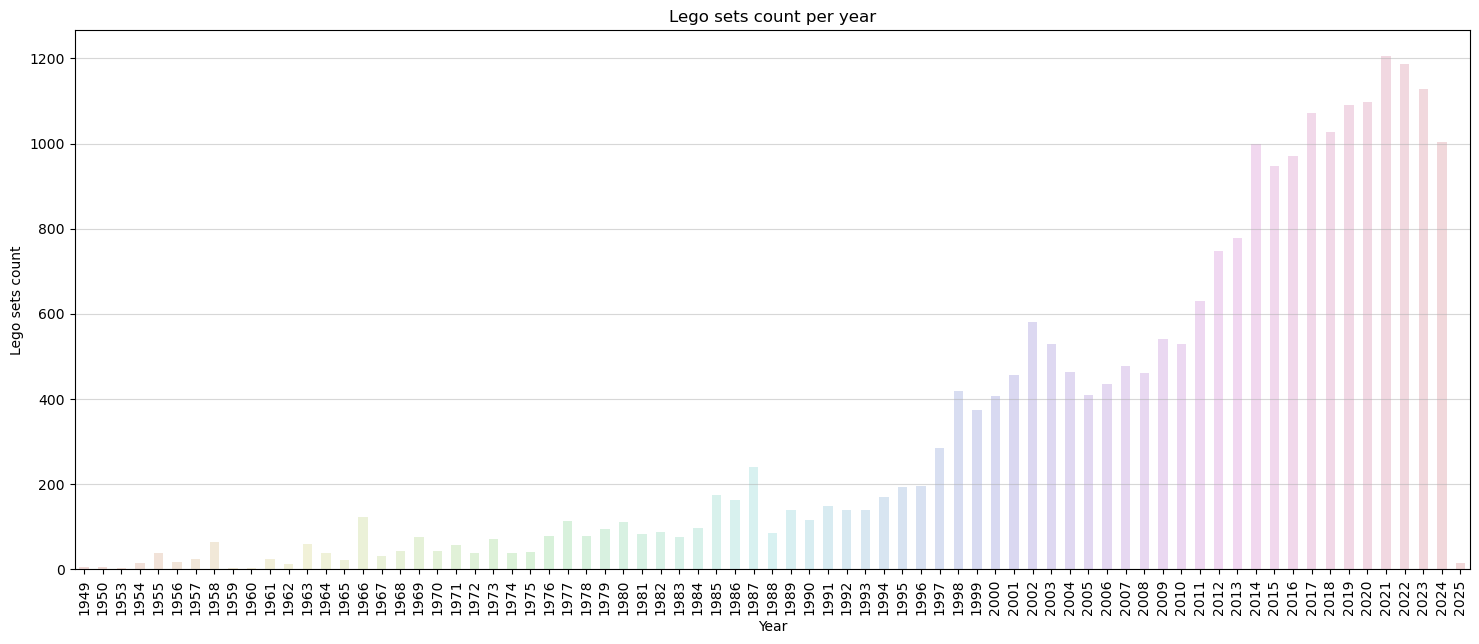

In [12]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(18,7))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_table_year, x='year', y='Count', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_table_year['year']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Lego sets count per year')
ax.set_ylabel('Lego sets count')
ax.set_xlabel('Year')
plt.show()

In [13]:
decades_ranges = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2020, np.inf]
decades_names = [x for x in range(1950, 2030, 10)]
sets_table_year['decade'] = pd.cut(sets_table_year['year'], bins=decades_ranges, labels=decades_names)
sets_table_year.head()

year  Count decade
0  1949      5   1950
1  1950      6   1950
2  1953      4   1950
3  1954     14   1950
4  1955     39   1950

In [15]:
sets_tables_decade = sets_table_year.groupby('decade').agg(Count=('Count', 'sum')).reset_index().sort_values(by='decade')
sets_tables_decade['decade'] = sets_tables_decade['decade'].astype(int)
sets_tables_decade

C:\Users\Dom\AppData\Local\Temp\ipykernel_27644\1817340300.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sets_tables_decade = sets_table_year.groupby('decade').agg(Count=('Count', 'sum')).reset_index().sort_values(by='decade')


decade  Count
0    1950    182
1    1960    465
2    1970    720
3    1980   1257
4    1990   2468
5    2000   4884
6    2010   9359
7    2020   4538

In [16]:
sets_tables_decade['Avg'] = sets_tables_decade['Count'] / 10
sets_tables_decade.loc[sets_tables_decade['decade'] == 1950, 'Avg'] = sets_tables_decade.loc[sets_tables_decade['decade'] == 1950, 'Count'] / 11
sets_tables_decade.loc[sets_tables_decade['decade'] == 2020, 'Avg'] = sets_tables_decade.loc[sets_tables_decade['decade'] == 2020, 'Count'] / 5

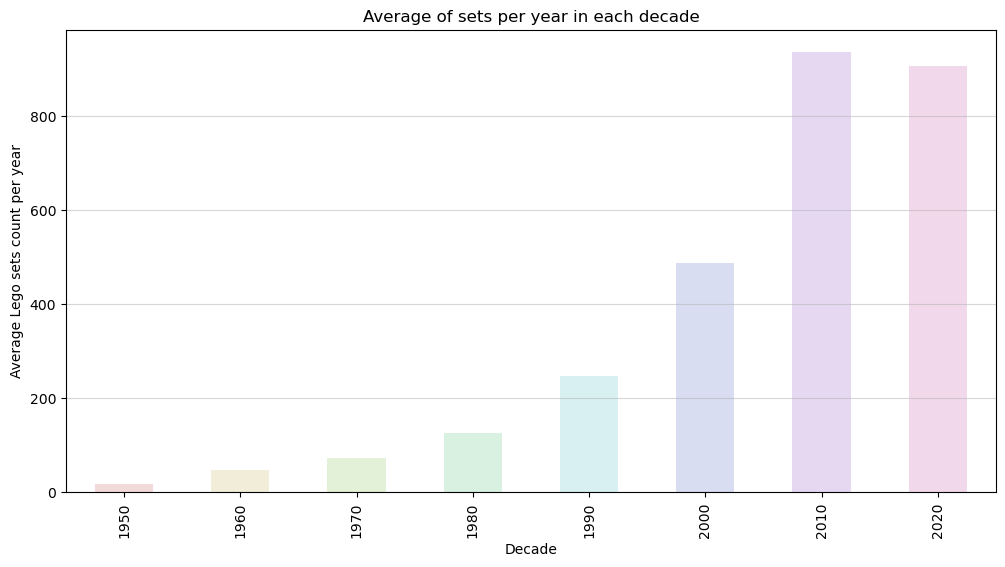

In [18]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_tables_decade, x='decade', y='Avg', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_tables_decade['decade']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Average of sets per year in each decade')
ax.set_ylabel('Average Lego sets count per year')
ax.set_xlabel('Decade')
plt.show()

In [19]:
print('Average number of Lego sets per year is:', int(sets_table_year['Count'].mean()))

Average number of Lego sets per year is: 318


Above are shown charts telling story how Lego has expanded through years - the company now produces more Lego sets per year than ever before, and it looks like it is still growing. But, to answet the question, as for now mean number of new Lego sets per year is 318.

## QUESTION 2:
2. What is the average number of Lego parts per year? Per set per year and total bricks in all sets per year.


In [30]:
# check if minifigs parts are also in inventory parts
inventories_df.loc[inventories_df['set_num'] == 'fig-000555']

inventory_id  version     set_num
16015         51370        1  fig-000555

In [31]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 51370]

inventory_id         part_num  color_id  quantity is_spare  \
768290         51370      3626bpr0310        14         1        f   
768291         51370             4530         0         1        f   
768292         51370           970c03         0         1        f   
768293         51370  973c22h01pr0173         4         1        f   

                                                  img_url  
768290  https://cdn.rebrickable.com/media/parts/photos...  
768291  https://cdn.rebrickable.com/media/parts/elemen...  
768292  https://cdn.rebrickable.com/media/parts/elemen...  
768293  https://cdn.rebrickable.com/media/parts/photos...

So, to be sure and certain and well count the distinction between spares and normal parts I need to add this inventory to the summary.

In [33]:
# number of unique set number
inventories_df['set_num'].nunique()

38716

In [34]:
a = sets_table['set_num'].nunique()
a

23873

In [35]:
b = inventories_df.loc[inventories_df['set_num'].str.match('fig'), 'set_num'].nunique()

In [36]:
a + b

38716

In [42]:
inventories_df = inventories_df.merge(parts_per_inventory, on='inventory_id', how='left')
inventories_df.head()

inventory_id  version set_num  max_version  parts  spares
0             1        1  7922-1            1    5.0     0.0
1             3        1  3931-1            1   39.0     3.0
2             4        1  6942-1            1   16.0     1.0
3            15        1  5158-1            1    2.0     0.0
4            16        1   903-1            1   10.0     0.0

In [43]:
inventories_df.shape

(38716, 6)

In [44]:
inventory_minifigs_df_with_num_parts = inventory_minifigs_df.merge(inventories_df, left_on='fig_num', right_on='set_num')
inventory_minifigs_df_with_num_parts.head()

inventory_id_x     fig_num  quantity  inventory_id_y  version     set_num  \
0               3  fig-001549         1           52364        1  fig-001549   
1               4  fig-000764         1           51579        1  fig-000764   
2           14589  fig-000764         1           51579        1  fig-000764   
3              19  fig-000555         1           51370        1  fig-000555   
4              25  fig-000574         1           51389        1  fig-000574   

   max_version  parts  spares  
0            1    4.0     0.0  
1            1    4.0     0.0  
2            1    4.0     0.0  
3            1    4.0     0.0  
4            1    5.0     0.0

In [45]:
inventory_minifigs_df_with_num_parts['parts_total'] = inventory_minifigs_df_with_num_parts['quantity'] * inventory_minifigs_df_with_num_parts['parts']

In [46]:
inventory_minifigs_df_with_num_parts[inventory_minifigs_df_with_num_parts['spares'] != 0]

inventory_id_x     fig_num  quantity  inventory_id_y  version  \
16903           43641  fig-011590         1          106762        1   

          set_num  max_version  parts  spares  parts_total  
16903  fig-011590            1    NaN     NaN          NaN

In [47]:
inventory_minifigs_df_with_num_parts.drop(columns=['inventory_id_y', 'set_num', 'max_version', 'parts', 'quantity', 'version', 'spares'], inplace=True)

In [48]:
inventory_minifigs_df_with_num_parts.rename(columns={'inventory_id_x': 'inventory_id'}, inplace=True)

In [49]:
inventory_minifigs_df_with_num_parts.head()

inventory_id     fig_num  parts_total
0             3  fig-001549          4.0
1             4  fig-000764          4.0
2         14589  fig-000764          4.0
3            19  fig-000555          4.0
4            25  fig-000574          5.0

In [50]:
figs_per_inventory = pd.pivot_table(inventory_minifigs_df_with_num_parts, values='parts_total', index=['inventory_id'], \
                                     aggfunc=["sum", 'count'], fill_value=0).reset_index()
figs_per_inventory.head()

inventory_id         sum       count
               parts_total parts_total
0            3         4.0           1
1            4         4.0           1
2           19         4.0           1
3           25         5.0           1
4           26        28.0           6

In [51]:
figs_per_inventory.columns = figs_per_inventory.columns.to_flat_index()
figs_per_inventory.columns

Index([('inventory_id', ''), ('sum', 'parts_total'), ('count', 'parts_total')], dtype='object')

In [52]:
figs_per_inventory.rename(columns={('inventory_id', ''): 'inventory_id', ('sum', 'parts_total'): 'fig_parts_sum', ('count', 'parts_total'): 'fig_count'}, inplace=True)
figs_per_inventory.head()

inventory_id  fig_parts_sum  fig_count
0             3            4.0          1
1             4            4.0          1
2            19            4.0          1
3            25            5.0          1
4            26           28.0          6

In [53]:
inventories_df = inventories_df.merge(figs_per_inventory, on='inventory_id', how='left')
inventories_df.head()

inventory_id  version set_num  max_version  parts  spares  fig_parts_sum  \
0             1        1  7922-1            1    5.0     0.0            NaN   
1             3        1  3931-1            1   39.0     3.0            4.0   
2             4        1  6942-1            1   16.0     1.0            4.0   
3            15        1  5158-1            1    2.0     0.0            NaN   
4            16        1   903-1            1   10.0     0.0            NaN   

   fig_count  
0        NaN  
1        1.0  
2        1.0  
3        NaN  
4        NaN

In [54]:
inventories_df.shape

(38716, 8)

In [55]:
inventory_parts_df.loc[(inventory_parts_df['inventory_id'] == 150237) & (inventory_parts_df['is_spare'] == 't')]

inventory_id     part_num  color_id  quantity is_spare  \
1071444        150237         2447        47         1        t   
1071446        150237        24866        30         1        t   
1071469        150237        34172        15         1        t   
1071475        150237         3673        14         1        t   
1071500        150237        53119        70         1        t   
1071507        150237         6141        46         1        t   
1071512        150237        64567         0         1        t   
1071525        150237        93160        15         1        t   
1071529        150237        98138        33         1        t   
1071530        150237  98138pr0056        84         1        t   

                                                   img_url  
1071444  https://cdn.rebrickable.com/media/parts/elemen...  
1071446  https://cdn.rebrickable.com/media/parts/elemen...  
1071469  https://cdn.rebrickable.com/media/parts/elemen...  
1071475  https://cdn.rebrickable.com/media/parts/elemen...  
1071500  https://cdn.rebrickable.com/media/parts/elemen...  
1071507  https://cdn.rebrickable.com/media/parts/elemen...  
1071512  https://cdn.rebrickable.com/media/parts/elemen...  
1071525  https://cdn.rebrickable.com/media/parts/elemen...  
1071529  https://cdn.rebrickable.com/media/parts/elemen...  
1071530  https://cdn.rebrickable.com/media/parts/elemen...

Create a column that sums all parts together - classic + figures parts.

In [56]:
inventories_df['total_parts'] = inventories_df['parts'] + inventories_df['fig_parts_sum']

In [57]:
inventories_df.columns

Index(['inventory_id', 'version', 'set_num', 'max_version', 'parts', 'spares',
       'fig_parts_sum', 'fig_count', 'total_parts'],
      dtype='object')

Columns explanation in inventories_df: \
'inventory_id' - inventory id \
'version' - version of set \
'set_num' - set number\
'max_version' - max version of set, used for filter data, no needed, now we analyze only sets with highest possible version\
'parts' - parts count (excluded minifigures parts and spares)\
'spares' - spares count\
'fig_parts_sum' - count of parts for all minifigures added in the set\
'fig_count' - number of minifigures in the set\
'total_parts' - total number of parts (parts + fig_parts_sum), excludes number of spare parts\
Still need to add year of the set to the DataFrame.

In [58]:
sets_table.head()

set_num                         name  year  theme_id  num_parts  \
0  0003977811-1  Ninjago: Book of Adventures  2022       761          1   
1         001-1                        Gears  1965       756         43   
2        0011-2            Town Mini-Figures  1979        67         12   
3        0011-3   Castle 2 for 1 Bonus Offer  1987       199          0   
4        0012-1           Space Mini-Figures  1979       143         12   

                                             img_url  
0  https://cdn.rebrickable.com/media/sets/0003977...  
1   https://cdn.rebrickable.com/media/sets/001-1.jpg  
2  https://cdn.rebrickable.com/media/sets/0011-2.jpg  
3  https://cdn.rebrickable.com/media/sets/0011-3.jpg  
4  https://cdn.rebrickable.com/media/sets/0012-1.jpg

In [59]:
inventories_df[inventories_df['set_num'] == '0011-3']

inventory_id  version set_num  max_version  parts  spares  \
1329          2216        1  0011-3            1    NaN     NaN   

      fig_parts_sum  fig_count  total_parts  
1329            NaN        NaN          NaN

In [60]:
len(set(inventories_df['set_num']))

38716

In [61]:
len(set(sets_table['set_num']))

23873

In [62]:
inventories_df.drop(inventories_df[inventories_df['set_num'].str.match('fig')].index, axis=0, inplace=True)
inventories_df.shape

(23873, 9)

In [63]:
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inventory_id   23873 non-null  int64  
 1   version        23873 non-null  int64  
 2   set_num        23873 non-null  object 
 3   max_version    23873 non-null  int64  
 4   parts          17793 non-null  float64
 5   spares         17793 non-null  float64
 6   fig_parts_sum  8284 non-null   float64
 7   fig_count      8284 non-null   float64
 8   total_parts    8056 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [64]:
inventories_df.fillna(0, inplace=True)
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inventory_id   23873 non-null  int64  
 1   version        23873 non-null  int64  
 2   set_num        23873 non-null  object 
 3   max_version    23873 non-null  int64  
 4   parts          23873 non-null  float64
 5   spares         23873 non-null  float64
 6   fig_parts_sum  23873 non-null  float64
 7   fig_count      23873 non-null  float64
 8   total_parts    23873 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [65]:
inventories_df['total_parts'] = inventories_df['parts'] + inventories_df['fig_parts_sum']
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inventory_id   23873 non-null  int64  
 1   version        23873 non-null  int64  
 2   set_num        23873 non-null  object 
 3   max_version    23873 non-null  int64  
 4   parts          23873 non-null  float64
 5   spares         23873 non-null  float64
 6   fig_parts_sum  23873 non-null  float64
 7   fig_count      23873 non-null  float64
 8   total_parts    23873 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [66]:
inventories_df['parts'] = inventories_df['parts'].astype('int64')
inventories_df['spares'] = inventories_df['spares'].astype('int64')
inventories_df['fig_parts_sum'] = inventories_df['fig_parts_sum'].astype('int64')
inventories_df['fig_count'] = inventories_df['fig_count'].astype('int64')
inventories_df['total_parts'] = inventories_df['total_parts'].astype('int64')
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inventory_id   23873 non-null  int64 
 1   version        23873 non-null  int64 
 2   set_num        23873 non-null  object
 3   max_version    23873 non-null  int64 
 4   parts          23873 non-null  int64 
 5   spares         23873 non-null  int64 
 6   fig_parts_sum  23873 non-null  int64 
 7   fig_count      23873 non-null  int64 
 8   total_parts    23873 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ MB


In [67]:
inventories_df.drop(columns=['max_version'], inplace=True)
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inventory_id   23873 non-null  int64 
 1   version        23873 non-null  int64 
 2   set_num        23873 non-null  object
 3   parts          23873 non-null  int64 
 4   spares         23873 non-null  int64 
 5   fig_parts_sum  23873 non-null  int64 
 6   fig_count      23873 non-null  int64 
 7   total_parts    23873 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.6+ MB


In [68]:
inventories_df.drop(columns=['version'], inplace=True)
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inventory_id   23873 non-null  int64 
 1   set_num        23873 non-null  object
 2   parts          23873 non-null  int64 
 3   spares         23873 non-null  int64 
 4   fig_parts_sum  23873 non-null  int64 
 5   fig_count      23873 non-null  int64 
 6   total_parts    23873 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [69]:
inventories_df.head()

inventory_id set_num  parts  spares  fig_parts_sum  fig_count  total_parts
0             1  7922-1      5       0              0          0            5
1             3  3931-1     39       3              4          1           43
2             4  6942-1     16       1              4          1           20
3            15  5158-1      2       0              0          0            2
4            16   903-1     10       0              0          0           10

<Axes: >

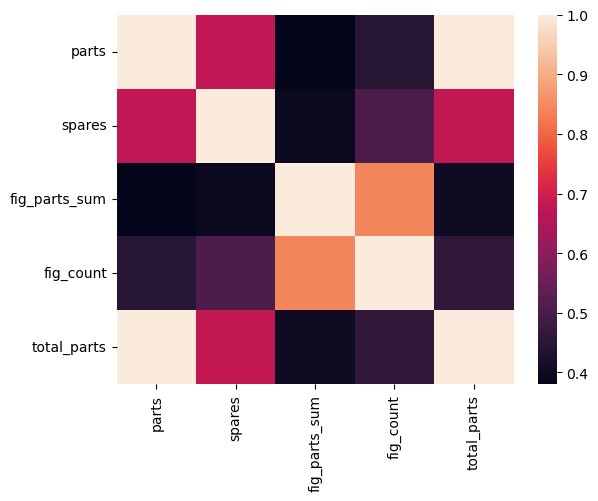

In [70]:
sns.heatmap(inventories_df[['parts', 'spares', 'fig_parts_sum', 'fig_count', 'total_parts']].corr())

<Axes: xlabel='total_parts', ylabel='spares'>

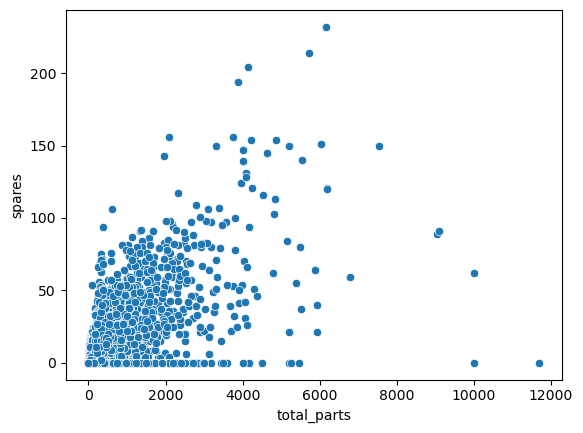

In [71]:
sns.scatterplot(data=inventories_df, x='total_parts', y='spares')

In [72]:
inventories_df['fig_count'].value_counts()

fig_count
0     15590
1      3948
2      1572
3      1062
4       644
5       377
6       256
7       142
8       103
9        57
10       25
12       18
11       18
13       13
14        9
15        9
22        6
21        4
16        3
19        3
18        3
28        2
25        2
17        1
31        1
29        1
69        1
23        1
24        1
20        1
Name: count, dtype: int64

In [73]:
inventories_df['parts'].value_counts()

parts
0       6094
1        786
2        660
3        511
4        400
        ... 
1127       1
2793       1
823        1
1959       1
2365       1
Name: count, Length: 1498, dtype: int64

In [74]:
inventories_df.loc[inventories_df['set_num'] == '60369-1'] # tractor : '60287-1' # Mobile Police Dog Training 60369

inventory_id  set_num  parts  spares  fig_parts_sum  fig_count  \
32240        150237  60369-1    188      10              9          2   

       total_parts  
32240          197

In [75]:
inventories_year_df = inventories_df.merge(sets_table, on='set_num')
inventories_year_df.head()

inventory_id set_num  parts  spares  fig_parts_sum  fig_count  total_parts  \
0             1  7922-1      5       0              0          0            5   
1             3  3931-1     39       3              4          1           43   
2             4  6942-1     16       1              4          1           20   
3            15  5158-1      2       0              0          0            2   
4            16   903-1     10       0              0          0           10   

                                                name  year  theme_id  \
0  McDonald's Sports Set Number 6 - Orange Vest S...  2004       460   
1                                 Emma's Splash Pool  2012       494   
2                                          Zo Weevil  1999       134   
3                          T-Junction, Circle Plates  1990       443   
4                          Train Wheels and Couplers  1969       371   

   num_parts                                            img_url  
0          5  https://cdn.rebrickable.com/media/sets/7922-1.jpg  
1         43  https://cdn.rebrickable.com/media/sets/3931-1.jpg  
2         20  https://cdn.rebrickable.com/media/sets/6942-1.jpg  
3          2  https://cdn.rebrickable.com/media/sets/5158-1.jpg  
4         10   https://cdn.rebrickable.com/media/sets/903-1.jpg

In [76]:
inventories_year_df.drop(columns=['name', 'img_url'], inplace=True)
inventories_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23873 entries, 0 to 23872
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inventory_id   23873 non-null  int64 
 1   set_num        23873 non-null  object
 2   parts          23873 non-null  int64 
 3   spares         23873 non-null  int64 
 4   fig_parts_sum  23873 non-null  int64 
 5   fig_count      23873 non-null  int64 
 6   total_parts    23873 non-null  int64 
 7   year           23873 non-null  int64 
 8   theme_id       23873 non-null  int64 
 9   num_parts      23873 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.8+ MB


In [77]:
inventories_year_df['diff'] = inventories_year_df['total_parts'] - inventories_year_df['num_parts']

In [78]:
inventories_year_df[inventories_year_df['diff'] != 0]

inventory_id          set_num  parts  spares  fig_parts_sum  fig_count  \
1924           3156           1049-1    238       0             12          1   
2123           3484            557-1    721       4              8          2   
4063           6813           1589-2    247       4             16          2   
4097           6862          70818-1    165      10             32          5   
4717           7901           3548-2      0       0              0          0   
...             ...              ...    ...     ...            ...        ...   
23107        233589        6527186-1     47       0              5          1   
23261        235781         892409-1      5       0              4          1   
23507        237019          75022-1    195       7             16          3   
23834        240921  9788325344535-1      3       0              5          1   
23837        240952  9788325345105-1     19       0              5          1   

       total_parts  year  theme_id  num_parts  diff  
1924           250  1985       507        238    12  
2123           729  1987       467        721     8  
4063           263  1986        67        259     4  
4097           197  2015       578        198    -1  
4717             0  2003       459          3    -3  
...            ...   ...       ...        ...   ...  
23107           52  2024       749         47     5  
23261            9  2024       435          5     4  
23507          211  2013       158        195    16  
23834            8  2024       761          3     5  
23837           24  2024       761         19     5  

[157 rows x 11 columns]

Need to further analyze carefully differences? Or stick to what I have counted? Or prepare charts for both perspectives? - to think\
Now let's take a look at a chart of mean parts value per set per year. Taking into consideration 'total_parts' columns.

In [79]:
data_for_chart = (inventories_year_df
                      .groupby('year')
                      .agg(
                          set_count=('total_parts', 'count'), 
                          parts_per_set_mean=('total_parts', 'mean')
                          )
                      .reset_index()
                      .sort_values(by='year')
                 )
data_for_chart.head()

year  set_count  parts_per_set_mean
0  1949          5           99.600000
1  1950          6            1.000000
2  1953          4           12.500000
3  1954         14            8.357143
4  1955         39           12.205128

In [80]:
data_for_chart['parts_per_set_mean'] = data_for_chart['parts_per_set_mean'].astype('int64')
data_for_chart.head()

year  set_count  parts_per_set_mean
0  1949          5                  99
1  1950          6                   1
2  1953          4                  12
3  1954         14                   8
4  1955         39                  12

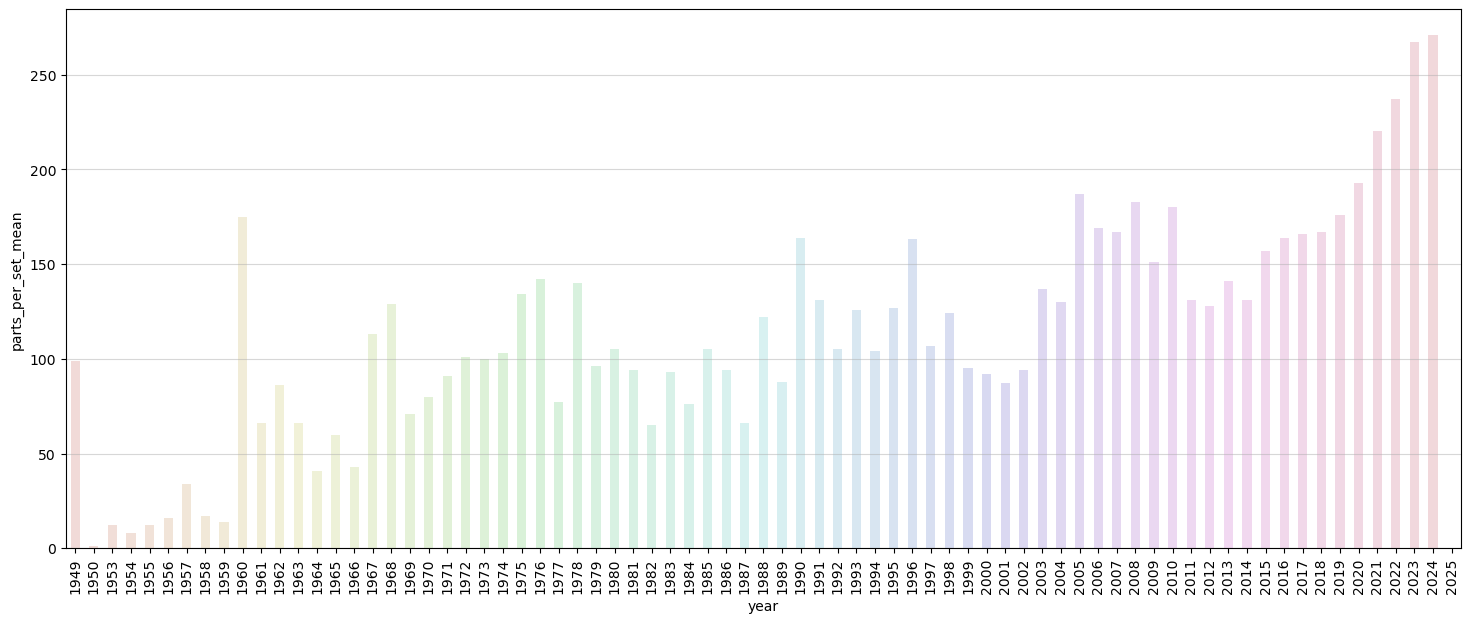

In [81]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(18,7))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = data_for_chart, x='year', y='parts_per_set_mean', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_table_year['year']) 
ax.tick_params(axis='x', rotation=90)
#ax.set_title('Lego sets count per year')
#ax.set_ylabel('Lego sets count')
#ax.set_xlabel('Year')
plt.show()

# TODO
Now I need to add minifigs to the dataframe.

In [82]:
# TODO - fix table above -> first groupby inventory_id then merge with figs_quantity + first groupby figs quantity

In [83]:
part_cat_df = pd.read_csv('data\part_categories.csv.gz')
part_cat_df.head()

id                     name
0   1               Baseplates
1   3            Bricks Sloped
2   4  Duplo, Quatro and Primo
3   5           Bricks Special
4   6            Bricks Wedged

In [84]:
inventory_parts_df = inventory_parts_df.merge(parts_df, on='part_num')

NameError: name 'parts_df' is not defined

In [ ]:
parts_per_set_year_df_3['difference'] = parts_per_set_year_df_3['Parts_Count'] - parts_per_set_year_df_3['num_parts']

In [ ]:
parts_per_set_year_df_3[parts_per_set_year_df_3['difference'] != 0]

In [ ]:
parts_per_set_year_df_3['difference'].describe()

In [ ]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.histplot(data = parts_per_set_year_df_3.loc[(parts_per_set_year_df_3['difference'] != 0) & (parts_per_set_year_df_3['num_parts'] != 0)], \
             x='difference', alpha=0.25, ax=ax, palette='hls') 
ax.set_title('Difference histogram')
ax.set_ylabel('Count')
ax.set_xlabel('Difference')
plt.show()

In [ ]:
parts_per_set_year_df_3.loc[parts_per_set_year_df_3['difference'] == 697]

In [ ]:
parts_per_set_year_df.info()

In [ ]:
np.sort(inventory_parts_df['part_num'].unique())

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1', 'quantity'].sum()

In [ ]:
sets_table.loc[sets_table['set_num'] == '60287-1']

In [ ]:
tractor_parts_desc = parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1'].merge(parts_df, on='part_num')
tractor_parts_desc

In [ ]:
tractor_parts_desc.drop(columns=['img_url', 'part_material'], inplace=True)
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc = tractor_parts_desc.merge(part_cat_df, left_on='part_cat_id', right_on='id')
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc.drop(columns=['part_cat_id', 'id'], inplace=True)
tractor_parts_desc.rename(columns={'name_x': 'part name', 'name_y': 'part category'}, inplace=True)
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc['part category'].unique()

In [ ]:
tractor_parts_desc.loc[tractor_parts_desc['part category'].isin(['Plants and Animals', 'Plates Round Curved and Dishes'])]

In [ ]:
inventory_minifigs_df.loc[inventory_minifigs_df['inventory_id'] == 80991]

In [ ]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '60287-1') & (parts_per_set_year_df['is_spare'] == 't'), 'is_spare'].count()

In [ ]:
sets_table.loc[(sets_table['set_num'] == '60287-1')]

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1', 'quantity'].sum()

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1']

In [ ]:
sets_table.loc[(sets_table['set_num'] == '10782-1')]

In [ ]:
inventories_df.loc[(inventories_df['set_num'] == '10782-1')]

In [ ]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '10782-1') & (parts_per_set_year_df['is_spare'] == 't')]

In [ ]:
parts_per_set_year_df = parts_per_set_year_df.merge(sets_table, on='set_num')

In [ ]:
parts_per_set_year_df.head()

## QUESTION 3:
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.


## QUESTION 4:
4. Figures: does Lego add now more figures to sets than in 1950? What are most common figures? How the number of figures changes? What are mean per set and total number of figures per year through time?

## QUESTION 5:
5. What are the 5 most popular colors used in Lego parts?


## QUESTION 6:
6. What proportion of Lego parts are transparent? What are most common transparent bricks? What are top 5 transparent colors? When first transparent bricks were used? What colors became transparent through time?



## QUESTION 7
7. What are the 5 rarest lego bricks?

## QUESTION 8:
8. What is the proportion of spare parts per set? Did it change through time?


## QUESTION 9:
9. Summarize your findings.